--- Numerical Column Analysis (Histograms and Boxplots) ---


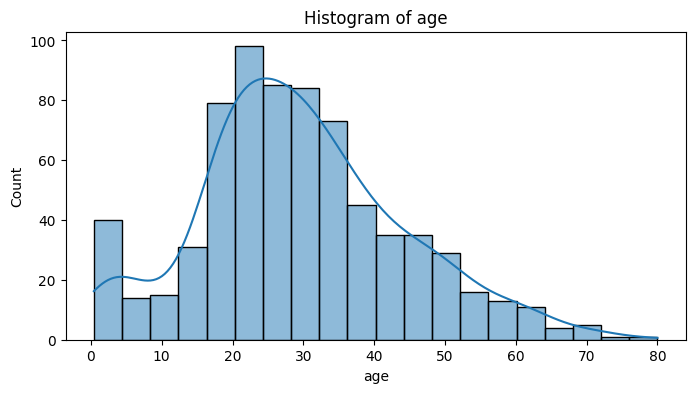

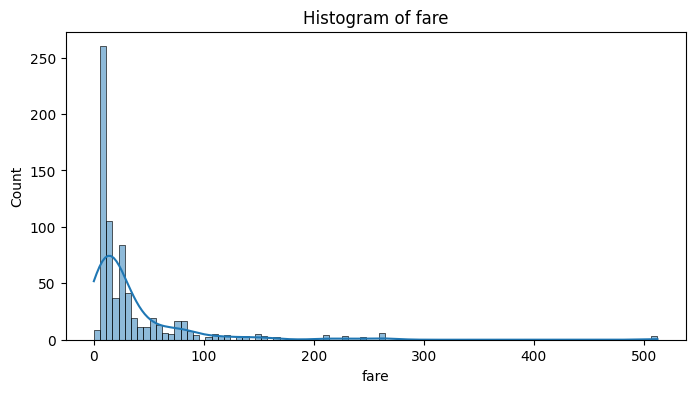

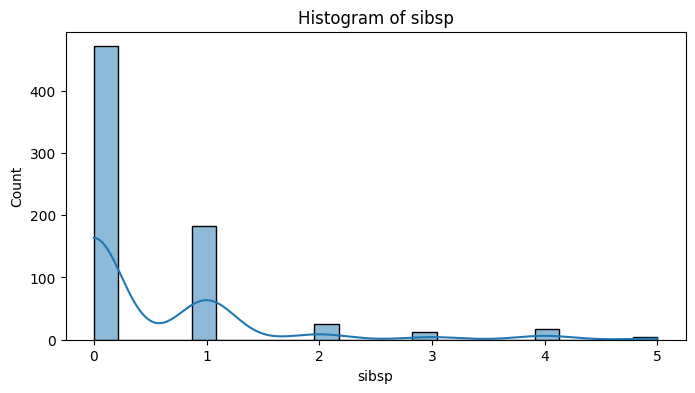

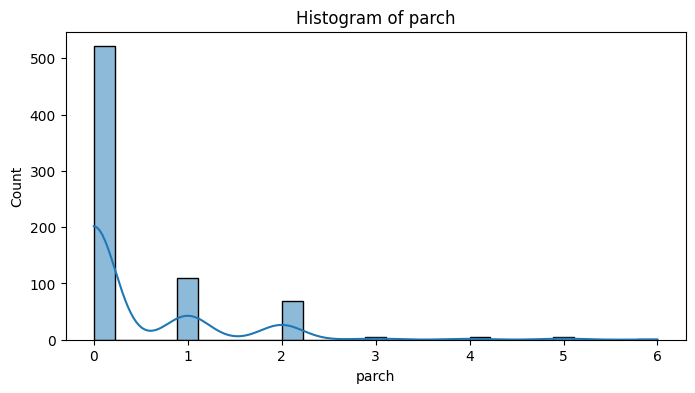

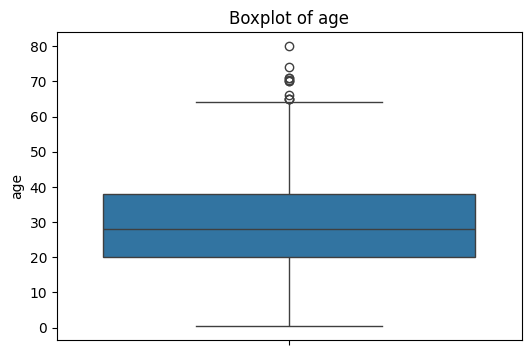

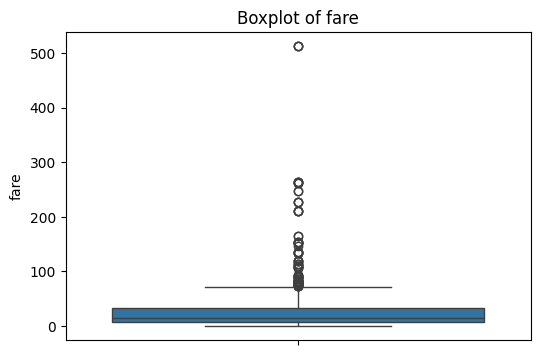

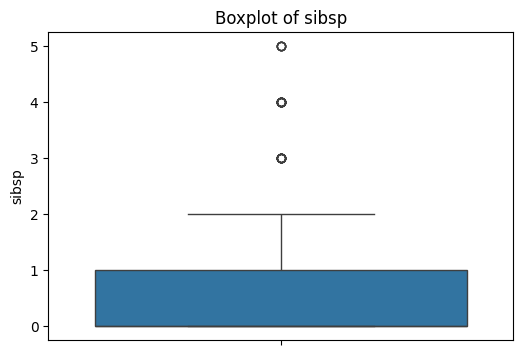

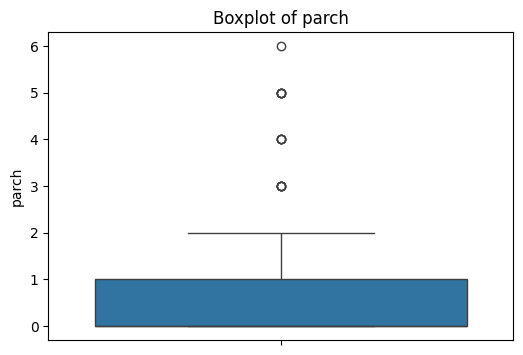


--- Categorical Column Analysis (Count Plots) ---


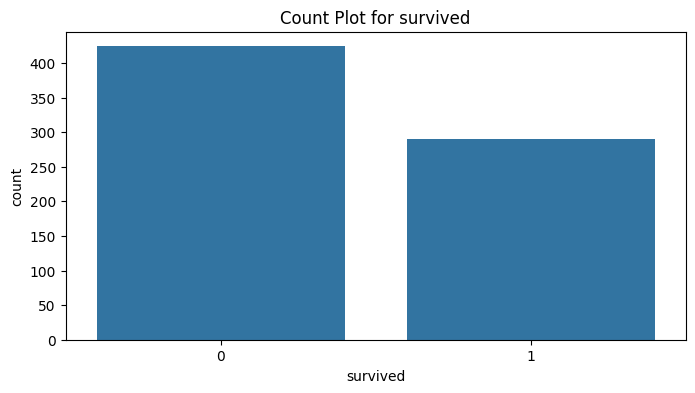

Value Counts for survived:
survived
0    59.38
1    40.62
Name: proportion, dtype: float64%



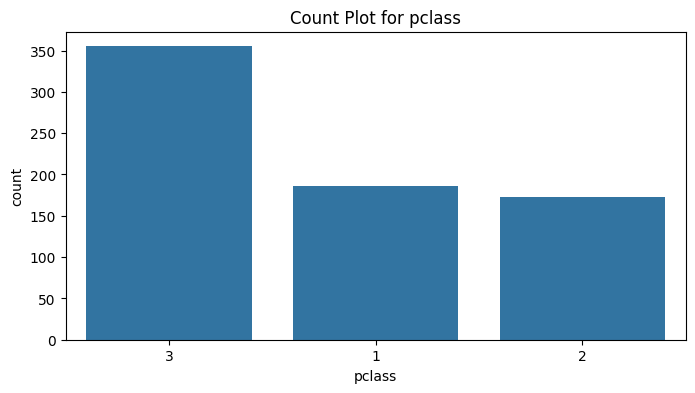

Value Counts for pclass:
pclass
3    49.72
1    26.05
2    24.23
Name: proportion, dtype: float64%



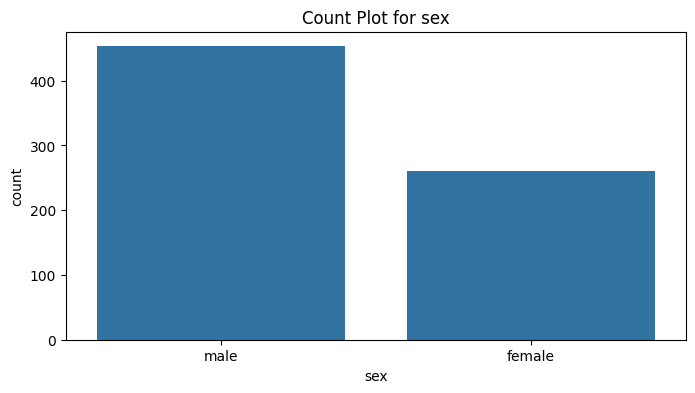

Value Counts for sex:
sex
male      63.45
female    36.55
Name: proportion, dtype: float64%



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NOTE: Replace 'titanic.csv' with your actual file path
df = pd.read_csv('titanic.csv')

# --- 1. Identify Numerical and Categorical Columns ---
# Assuming these are the relevant columns in the Titanic dataset:
numerical_cols = ['age', 'fare', 'sibsp', 'parch']
categorical_cols = ['survived', 'pclass', 'sex', ]

# --- 2. Analyze Numerical Columns ---

print("--- Numerical Column Analysis (Histograms and Boxplots) ---")

# Plot Histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True) # .dropna() handles missing values for plotting
    plt.title(f'Histogram of {col}')
    plt.show()

    # NOTE: Write observation here about distribution shape (skew, normal, etc.) and range.

# Plot Boxplots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.show()

    # NOTE: Write observation here about median, IQR, and presence of outliers.

# --- 3. Analyze Categorical Columns ---

print("\n--- Categorical Column Analysis (Count Plots) ---")

# Plot Bar Charts / Count Plots
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    # Use countplot to show the frequency of each category
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot for {col}')
    plt.show()

    # Print value counts for precise percentages (optional but useful)
    print(f"Value Counts for {col}:\n{df[col].value_counts(normalize=True).mul(100).round(2)}%\n")

    # NOTE: Write observation here about the frequency, dominant/rare categories, and balance.

In [4]:
print(df.columns)

Index(['survived', 'pclass', 'name', 'sex', 'age', 'fare', 'sibsp', 'parch'], dtype='object')


--- 3A. Relationship with Target Variable ('survived') ---


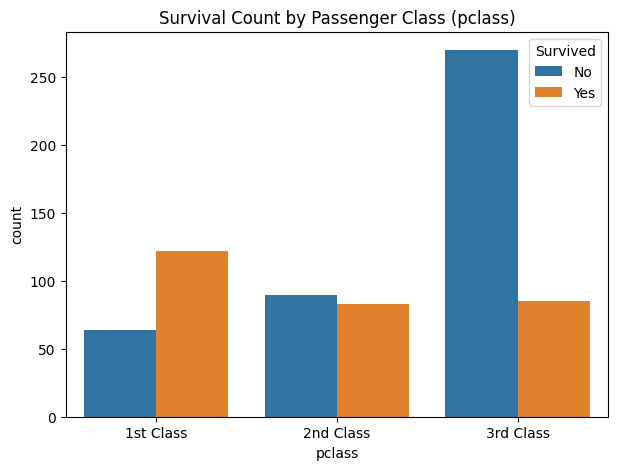

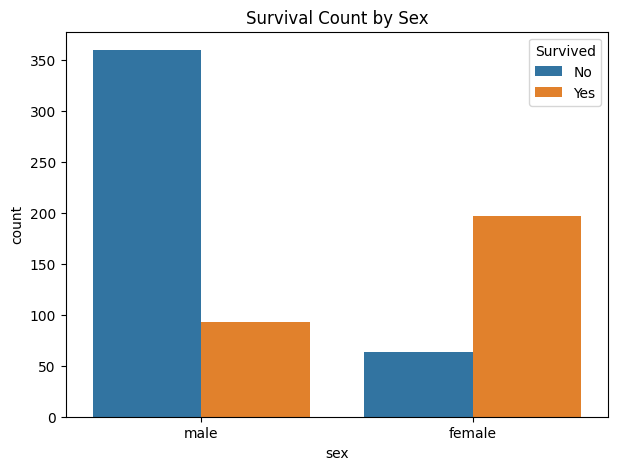

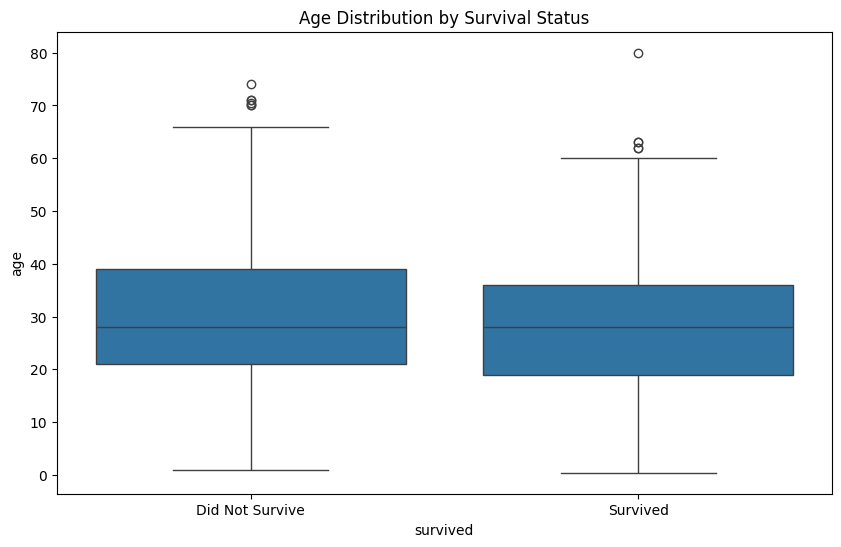

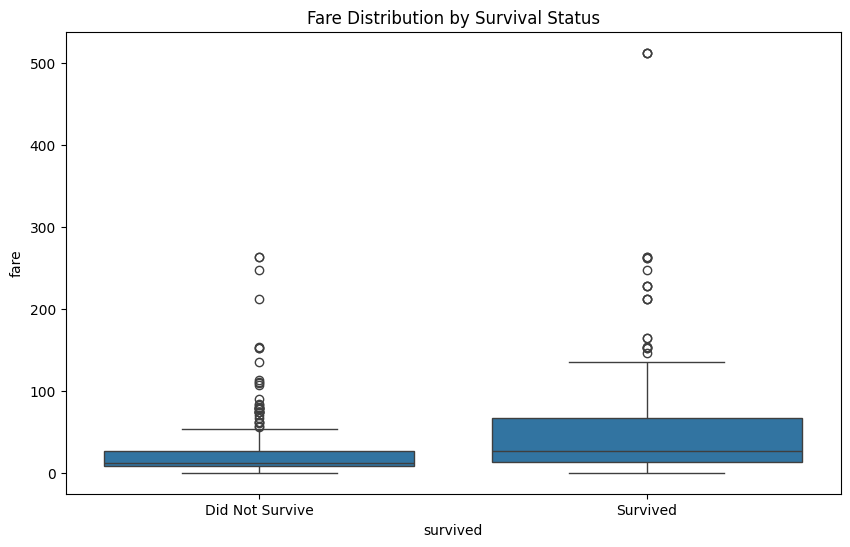


--- 3B. Correlation and Relationships Between Predictors ---


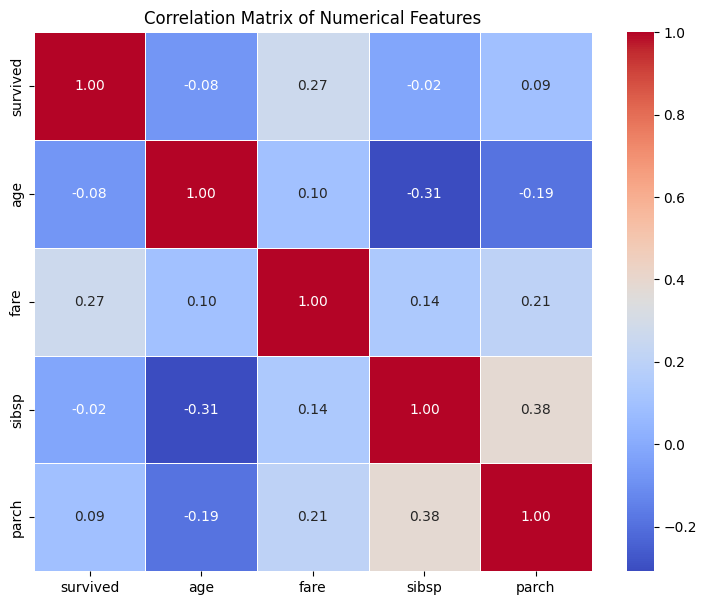

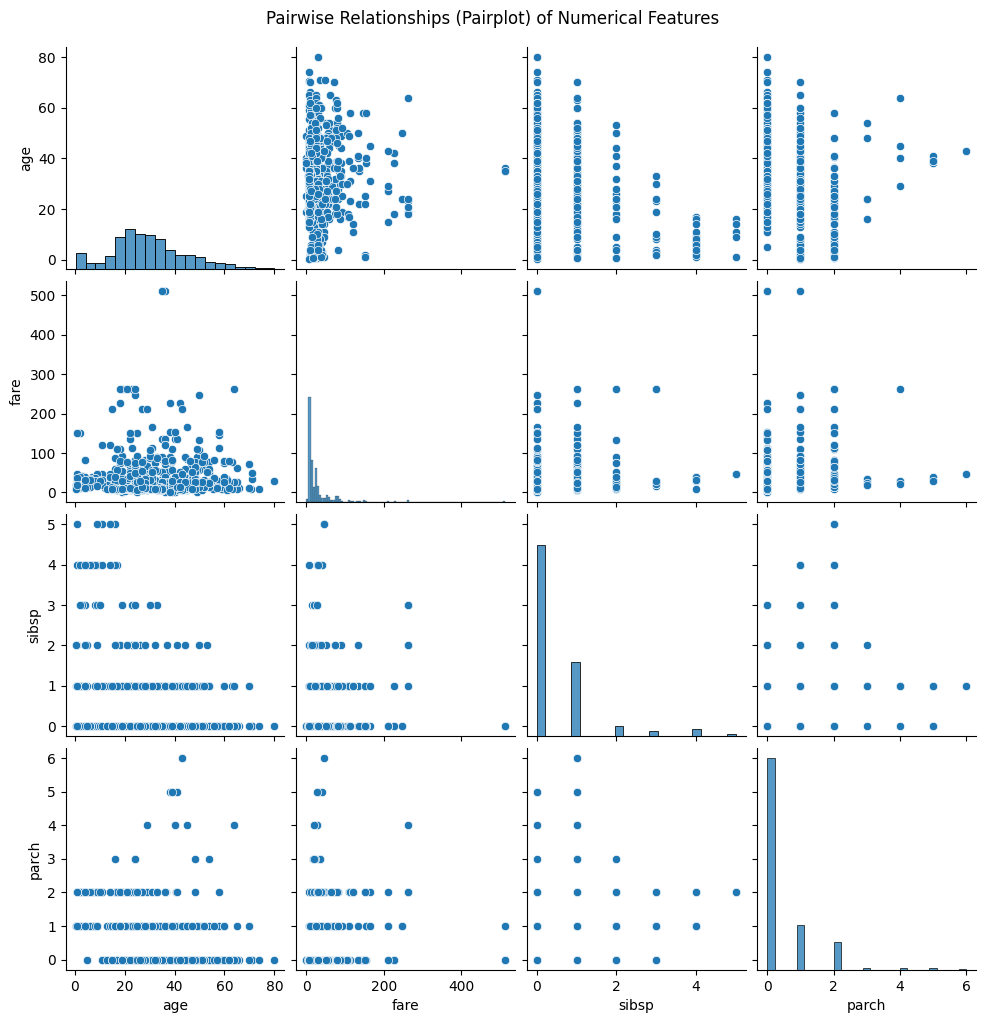

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define column lists based on your DataFrame's columns
numerical_cols_for_pairplot = ['age', 'fare', 'sibsp', 'parch']
numerical_and_target = ['survived', 'age', 'fare', 'sibsp', 'parch']
categorical_cols = ['pclass', 'sex'] # 'name' is usually excluded from this type of analysis

print("--- 3A. Relationship with Target Variable ('survived') ---")

# --- Categorical vs. Target ('survived') ---

# 1. Survival Rate by Pclass
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Survival Count by Passenger Class (pclass)')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
# NOTE: Observation: Compare survival proportions for each class.

# 2. Survival Rate by Sex
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival Count by Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
# NOTE: Observation: Determine if one gender had a significantly higher survival rate.


# --- Numerical vs. Target ('survived') ---

# 3. Age Distribution for Survivors vs. Non-Survivors
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='survived', y='age')
plt.title('Age Distribution by Survival Status')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'])
plt.show()
# NOTE: Observation: Compare the median age and spread for the two groups.

# 4. Fare Distribution for Survivors vs. Non-Survivors
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='survived', y='fare')
plt.title('Fare Distribution by Survival Status')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'])
plt.show()
# NOTE: Observation: Compare the median fare and presence of outliers for the two groups.


print("\n--- 3B. Correlation and Relationships Between Predictors ---")

# --- Heatmap (Correlation Check) ---

# 5. Calculate and Plot Correlation Matrix
# We include 'survived' to see its correlation with numerical predictors
corr_matrix = df[numerical_and_target].corr(numeric_only=True)

plt.figure(figsize=(9, 7))
# Use 'annot=True' to show the correlation values on the map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# NOTE: Observation: Identify strong correlations (e.g., between 'fare' and 'survived')
# and potential multicollinearity (correlation between two predictor variables).

# --- Pairwise Relationships ---

# 6. Pairplot for Numerical Predictors
# This can take a moment to run and is often best for smaller sets of columns.
# We exclude the target 'survived' here to focus on predictor relationships
sns.pairplot(df[numerical_cols_for_pairplot].dropna())
plt.suptitle('Pairwise Relationships (Pairplot) of Numerical Features', y=1.02)
plt.show()
# NOTE: Observation: Look for any specific clusters or non-linear patterns between pairs.